In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 10

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/5 [=====>........................] - ETA: 4s - loss: 2.5404 - accuracy: 0.1094
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 1s 85ms/step - loss: 2.4906 - accuracy: 0.0846 - val_loss: 2.4197 - val_accuracy: 0.0545
Epoch 2/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.4245 - accuracy: 0.0938
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 24ms/step - loss: 2.4010 - accuracy: 0.1061 - val_loss: 2.3355 - val_accuracy: 0.0545
Epoch 3/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.4471 - accuracy: 0.0234

c:\Users\Fawziya\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 23ms/step - loss: 2.3535 - accuracy: 0.0945 - val_loss: 2.2704 - val_accuracy: 0.0545
Epoch 4/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.2950 - accuracy: 0.1250
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 20ms/step - loss: 2.2947 - accuracy: 0.1078 - val_loss: 2.2148 - val_accuracy: 0.0545
Epoch 5/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.2442 - accuracy: 0.1328
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [==============================] - 0s 19ms/step - loss: 2.2318 - accuracy: 0.1227 - val_loss: 2.1689 - val_accuracy: 0.1535
Epoch 6/1000
1/5 [=====>........................] - ETA: 0s - loss: 2.2323 - accuracy: 0.1172
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
5/5 [========================

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 9ms/step - loss: 0.0268 - accuracy: 1.0000


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 248ms/step
[4.8894949e-06 9.0401934e-04 9.9903971e-01 4.7046099e-22 2.8112736e-13
 5.0888388e-10 3.4178252e-15 8.2730730e-06 1.6226005e-06 4.1529362e-05]
2


In [15]:
import time

# Assuming model is your trained TensorFlow/Keras model
start_time = time.time()
predictions = model.predict(X_test)  # Replace X_test with your inference data
inference_time = time.time() - start_time

print(f"Inference Time: {inference_time} seconds")


7/7 [==============================] - 0s 5ms/step
Inference Time: 0.29188036918640137 seconds


In [16]:
pip install psutil

Note: you may need to restart the kernel to use updated packages.


In [17]:
import psutil

# Assuming model is your trained TensorFlow/Keras model
# Assuming X_test is your inference data
predictions = model.predict(X_test)

# Measure memory usage after inference
memory_used = psutil.virtual_memory().used
print(f"Memory Used: {memory_used} bytes")


7/7 [==============================] - 0s 2ms/step
Memory Used: 7850754048 bytes


# Confusion matrix

7/7 [==============================] - 0s 1ms/step


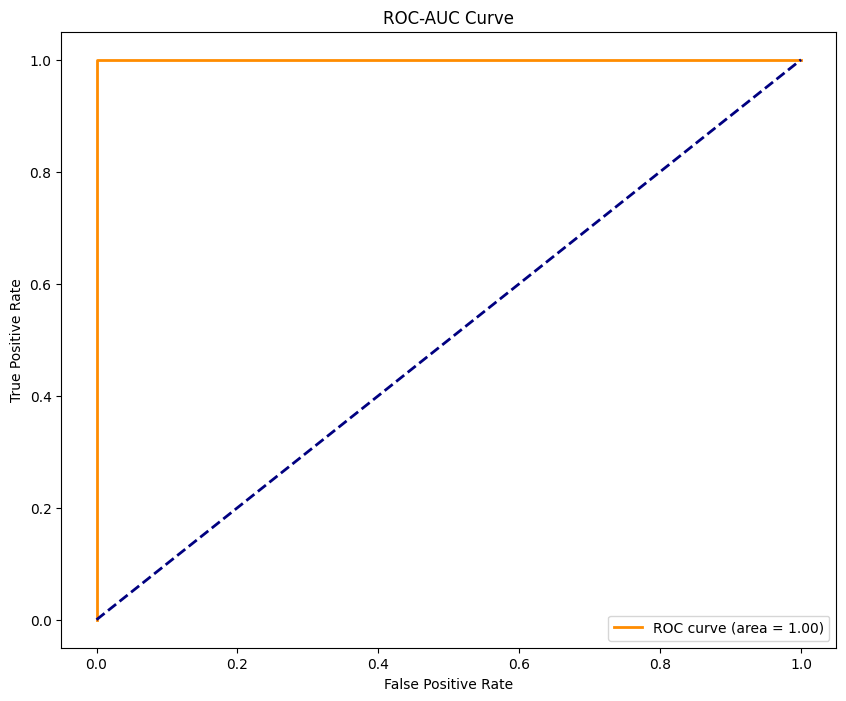

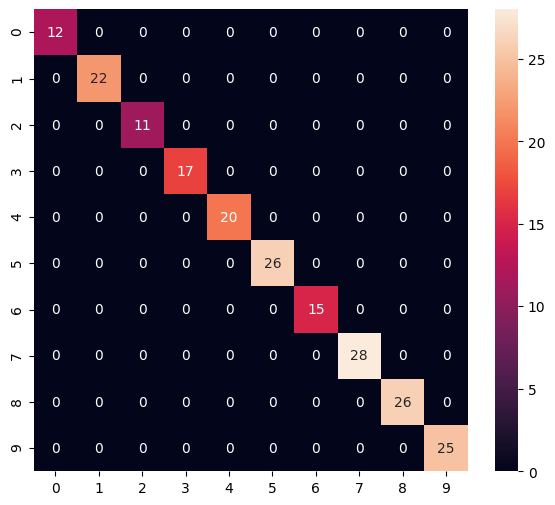

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        28
           8       1.00      1.00      1.00        26
           9       1.00      1.00      1.00        25

    accuracy                           1.00       202
   macro avg       1.00      1.00      1.00       202
weighted avg       1.00      1.00      1.00       202



In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

def print_confusion_matrix(y_true, y_pred, report=True):
    # Move the variable declaration here
    labels = sorted(list(set(y_true)))
    
    y_true_bin = label_binarize(y_true, classes=labels)
    y_pred_bin = label_binarize(y_pred, classes=labels)

    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 8))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend(loc='lower right')
    plt.show()

    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred, report=True)


# Convert to model for Tensorflow-Lite

In [19]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\Users\Fawziya\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Fawziya\AppData\Local\Temp\tmpsqan9w0d\assets


INFO:tensorflow:Assets written to: C:\Users\Fawziya\AppData\Local\Temp\tmpsqan9w0d\assets


6808

# Inference test

In [21]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [22]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [23]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [24]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 7.53 ms


In [25]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.8894990e-06 9.0401713e-04 9.9903959e-01 4.7045907e-22 2.8112679e-13
 5.0888377e-10 3.4177987e-15 8.2730476e-06 1.6225955e-06 4.1529202e-05]
2
